**The problems in this assignment are sequential. There is no need to load finance_data or text_data from the CSV files for each question.**

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
# read finance data from csv
finance_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/finance_data.csv')
# read text data from csv
text_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/text_data.csv')

# look at the data sample
finance_data.head()
text_data.head()

ticker  year quarter  total_word_count       neg       neu       pos  \
0   SWKS  2022      q1              5408  0.013799  0.794847  0.191359   
1    CVS  2022      q1              7238  0.011254  0.823173  0.165576   
2    VNO  2022      q1              8400  0.014297  0.881848  0.103842   
3    BMY  2022      q1              8107  0.012447  0.816974  0.170585   
4    LVS  2022      q1              4458  0.021880  0.787235  0.190891   

   compound  
0  0.266350  
1  0.294958  
2  0.185106  
3  0.266373  
4  0.206733

**Question 1: If a row in finance_data has null sic_two_digit, that means the financial data could not be effectively extracted from the database. Write code to remove the rows in finance_data if sic_two_digit is null.**

In [15]:
finance_data = finance_data.dropna(subset=['sic_two_digit'])

**Question 2: After we describe the data, we notice that the revenue column has remaining null values. Write code to fill the null values in revenue with the average of non-null revenue values.**

In [16]:
# Replace null values in 'revenue' column with the mean of non-null values
finance_data['revenue'] = finance_data['revenue'].fillna(finance_data['revenue'].mean())

**Question 3: After further examination of the data, we find that there is a wrong entry in the ticker column. Write code to replace the ticker which equals 'BFB' to 'BF.B' in text_data.**

In [17]:
text_data['ticker'] = text_data['ticker'].replace('BFB', 'BF.B')

**Question 4: Write code to identify the row(s) in text_data whose ticker is not in finance_data.**

In [18]:
not_in_finance = text_data[~text_data['ticker'].isin(finance_data['ticker'])]
print("Rows in text_data not found in finance_data:\n", not_in_finance)

Rows in text_data not found in finance_data:
    ticker  year quarter  total_word_count       neg       neu       pos  \
33    FRC  2022      q1              8017  0.010314  0.811126  0.178553   

    compound  
33  0.281495  


**Question 5: Write code to merge finance_data and text_data on three columns: ticker, year, and quarter. Name the merged DataFrame "merged_data".**

*Hint: If two rows in finance_data and text_data have equal values on all of the three fields (i.e., ticker, year, and quarter), we merge the rows.*

In [19]:
merged_data = pd.merge(finance_data, text_data, on=['ticker', 'year', 'quarter'])

**Question 6: Write code to count the number of rows for each unique sic_two_digit in merged_data**

In [20]:
sic_counts = merged_data['sic_two_digit'].value_counts()
print("Count of rows for each unique sic_two_digit:\n", sic_counts)

Count of rows for each unique sic_two_digit:
 sic_two_digit
36.0    12
28.0    11
73.0    10
60.0     6
49.0     5
13.0     5
67.0     5
35.0     4
20.0     4
37.0     3
26.0     3
38.0     3
48.0     2
30.0     2
79.0     2
87.0     2
45.0     2
80.0     2
53.0     2
44.0     2
61.0     2
63.0     2
29.0     1
15.0     1
39.0     1
57.0     1
27.0     1
42.0     1
59.0     1
31.0     1
Name: count, dtype: int64


**Question 7: Add a new column labeled as industry to merged_data. If sic_two_digit is 36, industry equals 'Electronics'. If sic_two_digit is 28, industry equals 'Chemicals'. If sic_two_digit is 73, industry is 'Business Services'. For other sic_two_digit values, industry is 'Others'**

In [22]:
def industry_label(sic):
    if sic == 36:
        return 'Electronics'
    elif sic == 28:
        return 'Chemicals'
    elif sic == 73:
        return 'Business Services'
    else:
        return 'Others'

merged_data['industry'] = merged_data['sic_two_digit'].apply(industry_label)

**Question 8: Write code to answer the following question: for each industry (i.e., Electronics, Chemicals, Business Services and Others), what is the average revenue and average total_word_count?**

In [23]:
industry_averages = merged_data.groupby('industry')[['revenue', 'total_word_count']].mean()
print("Average revenue and total_word_count for each industry:\n", industry_averages)

Average revenue and total_word_count for each industry:
                         revenue  total_word_count
industry                                         
Business Services   3110.753300       6324.900000
Chemicals           7030.797091       7960.545455
Electronics         4168.828833       7508.166667
Others             10315.005588       7438.378788


**Question 9: Write code to answer the following question: what is the correlation between a company's return on asset and its compound sentiment score?**

*Hint: Return on asset is net income divided by total assets.*

In [24]:
merged_data['return_on_asset'] = merged_data['net_income'] / merged_data['total_assets']
correlation = merged_data['return_on_asset'].corr(merged_data['compound'])
print("Correlation between return on asset and compound sentiment score:", correlation)

Correlation between return on asset and compound sentiment score: 0.02453846625820225


**Question 10: Plot a scatter plot with return on asset and compound sentiment score on the x-axis and y-axis, respectively. Explain the pattern that you see in the plot.**

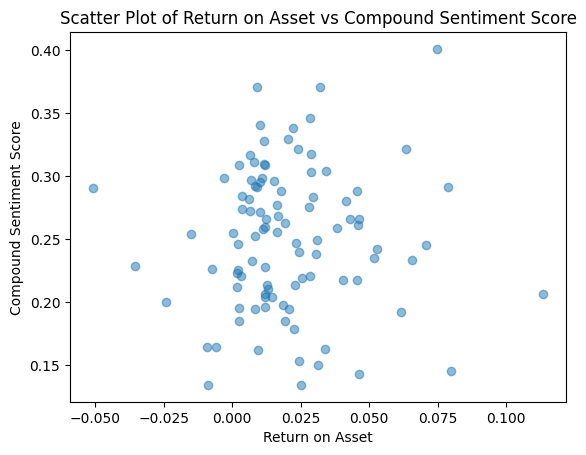

In [25]:
import matplotlib.pyplot as plt

plt.scatter(merged_data['return_on_asset'], merged_data['compound'], alpha=0.5)
plt.xlabel('Return on Asset')
plt.ylabel('Compound Sentiment Score')
plt.title('Scatter Plot of Return on Asset vs Compound Sentiment Score')
plt.show()